In [81]:
import pandas as pd
from pandas import read_excel
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [82]:
data = read_excel("climatic_data_ekm.xlsx")

In [83]:
dfa = pd.read_excel (r'climatic_data_ekm.xlsx')

In [84]:
print("********** top 5 of the dataframe *****************")
print(data.head())
print("********** data type of the features *****************")
print(data.dtypes)

********** top 5 of the dataframe *****************
   YEAR  MAX.TEM  MIN.TEM  Rainfall_mm  Humidity  Dengue_Cases  Leptospirosis
0  2014       32       24         3604        80           192            136
1  2015       32       25         3436        79           318            115
2  2016       32       25         2891        80           446             65
3  2017       32       25         2325        80           510             96
4  2018       32       25         2919        80           181             77
********** data type of the features *****************
YEAR             int64
MAX.TEM          int64
MIN.TEM          int64
Rainfall_mm      int64
Humidity         int64
Dengue_Cases     int64
Leptospirosis    int64
dtype: object


In [85]:
#df['YEAR'] = pd.to_datetime(df.YEAR , format = '%Y')
#data = df.drop(['YEAR'], axis=1)
#data.index = df.YEAR

In [86]:
from datetime import datetime
con=data['YEAR']
data['YEAR']=pd.to_datetime(data['YEAR'], format = '%Y')
data.set_index('YEAR', inplace=True)
#check datatype of index
data.index

DatetimeIndex(['2014-01-01', '2015-01-01', '2016-01-01', '2017-01-01',
               '2018-01-01'],
              dtype='datetime64[ns]', name='YEAR', freq=None)

In [87]:
data.dtypes

MAX.TEM          int64
MIN.TEM          int64
Rainfall_mm      int64
Humidity         int64
Dengue_Cases     int64
Leptospirosis    int64
dtype: object

In [88]:
#convert to time series:
ts = data['MAX.TEM']
ts.head(10)

YEAR
2014-01-01    32
2015-01-01    32
2016-01-01    32
2017-01-01    32
2018-01-01    32
Name: MAX.TEM, dtype: int64

In [89]:
ts['2014-01-01']

32

In [90]:
ts['2014-01-01':'2018-01-01']

YEAR
2014-01-01    32
2015-01-01    32
2016-01-01    32
2017-01-01    32
2018-01-01    32
Name: MAX.TEM, dtype: int64

In [91]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults

## Predicting MAX.TEM

In [92]:
model = AutoReg(ts, lags=0)
model_fit = model.fit()

In [93]:
yhat = model_fit.predict(len(ts), len(ts))
print(yhat)

2019-01-01    32.0
Freq: AS-JAN, dtype: float64


In [94]:
X = ts.astype('float32')
model = ARIMA(X, order=(0,1,0))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(len(X), len(X), typ='levels')
print(yhat)

2019-01-01    32.0
Freq: AS-JAN, dtype: float64


In [95]:
start_index = len(X)
end_index = start_index + 3
forecast = model_fit.predict(start=start_index, end=end_index, typ='levels')
print(forecast)

2019-01-01    32.0
2020-01-01    32.0
2021-01-01    32.0
2022-01-01    32.0
Freq: AS-JAN, dtype: float64


In [96]:
type(forecast)

pandas.core.series.Series

In [97]:
dataframe=pd.DataFrame({'YEAR':forecast.index,'MAX.TEM':forecast.values})

## Predicting Rainfall_mm

In [98]:
ts1 = data['Rainfall_mm']
ts1.head(10)

YEAR
2014-01-01    3604
2015-01-01    3436
2016-01-01    2891
2017-01-01    2325
2018-01-01    2919
Name: Rainfall_mm, dtype: int64

In [99]:
model1 = AutoReg(ts1, lags=1)
model_fit1 = model1.fit()
yhat1 = model_fit1.predict(len(ts1), len(ts1))
print(yhat1)

2019-01-01    2839.20184
Freq: AS-JAN, dtype: float64


In [100]:
X = ts1.astype('float32')
model = ARIMA(X, order=(0,1,0))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(len(X), len(X), typ='levels')
print(yhat)

2019-01-01    2747.75
Freq: AS-JAN, dtype: float64


In [101]:
start_index = len(X)
end_index = start_index + 3
forecast = model_fit.predict(start=start_index, end=end_index, typ='levels')
print(forecast)

2019-01-01    2747.75
2020-01-01    2576.50
2021-01-01    2405.25
2022-01-01    2234.00
Freq: AS-JAN, dtype: float64


In [102]:
dataframe['Rainfall_mm']=pd.DataFrame(forecast.values)

## Predicting MIN.TEM

In [103]:
ts2 = data['MIN.TEM']
ts2.head(10)

YEAR
2014-01-01    24
2015-01-01    25
2016-01-01    25
2017-01-01    25
2018-01-01    25
Name: MIN.TEM, dtype: int64

In [104]:
X = ts2.astype('float32')
model = ARIMA(X, order=(0,1,0))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(len(X), len(X), typ='levels')
print(yhat)

2019-01-01    25.25
Freq: AS-JAN, dtype: float64


In [105]:
start_index = len(X)
end_index = start_index + 3
forecast = model_fit.predict(start=start_index, end=end_index, typ='levels')
print(forecast)

2019-01-01    25.25
2020-01-01    25.50
2021-01-01    25.75
2022-01-01    26.00
Freq: AS-JAN, dtype: float64


In [106]:
dataframe['MIN.TEM']=pd.DataFrame(forecast.values)

## Predicting Humidity

In [107]:
ts3 = data['Humidity']
ts3.head(10)

YEAR
2014-01-01    80
2015-01-01    79
2016-01-01    80
2017-01-01    80
2018-01-01    80
Name: Humidity, dtype: int64

In [108]:
X = ts3.astype('float32')
model = ARIMA(X, order=(0,1,0))
model_fit = model.fit(disp=False)
start_index = len(X)
end_index = start_index + 3
forecast = model_fit.predict(start=start_index, end=end_index, typ='levels')
print(forecast)

2019-01-01    80.0
2020-01-01    80.0
2021-01-01    80.0
2022-01-01    80.0
Freq: AS-JAN, dtype: float64


In [109]:
dataframe['Humidity']=pd.DataFrame(forecast.values)

## Predicting Dengue_Cases

In [110]:
ts4 = data['Dengue_Cases']
ts4.head(10)

YEAR
2014-01-01    192
2015-01-01    318
2016-01-01    446
2017-01-01    510
2018-01-01    181
Name: Dengue_Cases, dtype: int64

In [111]:
X = ts4.astype('float32')
model = ARIMA(X, order=(0,1,0))
model_fit = model.fit(disp=False)
start_index = len(X)
end_index = start_index + 3
forecast = model_fit.predict(start=start_index, end=end_index, typ='levels')
print(forecast)

2019-01-01    178.25
2020-01-01    175.50
2021-01-01    172.75
2022-01-01    170.00
Freq: AS-JAN, dtype: float64


In [112]:
dataframe['Dengue_Cases']=pd.DataFrame(forecast.values)

## Predicting Leptospirosis

In [113]:
ts5 = data['Leptospirosis']
ts5.head(10)

YEAR
2014-01-01    136
2015-01-01    115
2016-01-01     65
2017-01-01     96
2018-01-01     77
Name: Leptospirosis, dtype: int64

In [114]:
X = ts5.astype('float32')
model = ARIMA(X, order=(0,1,0))
model_fit = model.fit(disp=False)
start_index = len(X)
end_index = start_index + 3
forecast = model_fit.predict(start=start_index, end=end_index, typ='levels')
print(forecast)

2019-01-01    62.25
2020-01-01    47.50
2021-01-01    32.75
2022-01-01    18.00
Freq: AS-JAN, dtype: float64


In [115]:
dataframe['Leptospirosis']=pd.DataFrame(forecast.values)

## Multivariate Time Series Forecasting

In [116]:
data = read_excel("climatic_data_ekm.xlsx")

In [117]:
data['YEAR']=pd.to_datetime(data['YEAR'], format = '%Y')
data.set_index('YEAR', inplace=True)
#check datatype of index
data.index

DatetimeIndex(['2014-01-01', '2015-01-01', '2016-01-01', '2017-01-01',
               '2018-01-01'],
              dtype='datetime64[ns]', name='YEAR', freq=None)

In [118]:
data.head()

,MAX.TEM,MIN.TEM,Rainfall_mm,Humidity,Dengue_Cases,Leptospirosis
YEAR,,,,,,
2014-01-01,32,24,3604,80,192,136
2015-01-01,32,25,3436,79,318,115
2016-01-01,32,25,2891,80,446,65
2017-01-01,32,25,2325,80,510,96
2018-01-01,32,25,2919,80,181,77


In [119]:
data = data.drop(['MAX.TEM'], axis=1)

In [120]:
data.head()

,MIN.TEM,Rainfall_mm,Humidity,Dengue_Cases,Leptospirosis
YEAR,,,,,
2014-01-01,24,3604,80,192,136
2015-01-01,25,3436,79,318,115
2016-01-01,25,2891,80,446,65
2017-01-01,25,2325,80,510,96
2018-01-01,25,2919,80,181,77


In [121]:
data.dtypes

MIN.TEM          int64
Rainfall_mm      int64
Humidity         int64
Dengue_Cases     int64
Leptospirosis    int64
dtype: object

In [122]:
from statsmodels.tsa.vector_ar.var_model import VAR

In [123]:
model = VAR(endog=data)
model_fit = model.fit()

In [124]:
yhat = model_fit.forecast(model_fit.y, steps=1)
print(yhat)

[[  24.0979888  3177.55343412   74.47730561  250.11875185  249.71606565]]


In [125]:
dataframe.head()

,YEAR,MAX.TEM,Rainfall_mm,MIN.TEM,Humidity,Dengue_Cases,Leptospirosis
0,2019-01-01,32.0,2747.75,25.25,80.0,178.25,62.25
1,2020-01-01,32.0,2576.50,25.50,80.0,175.50,47.50
2,2021-01-01,32.0,2405.25,25.75,80.0,172.75,32.75
3,2022-01-01,32.0,2234.00,26.00,80.0,170.00,18.00


## Visualization

In [128]:
from string import ascii_letters
import seaborn as sns

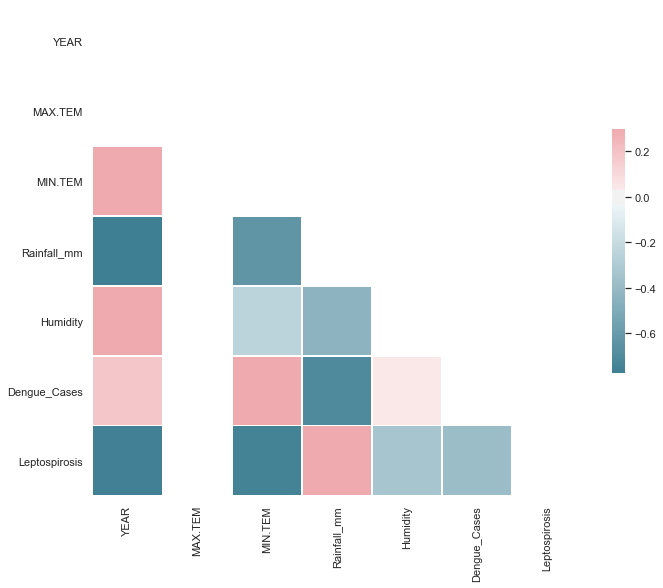

In [129]:
sns.set(style="white")

# Generate a large random dataset
#rs = np.random.RandomState(33)
#d = pd.DataFrame(data=rs.normal(size=(100, 26)),columns=list(ascii_letters[26:]))


# Compute the correlation matrix
corr = dfa.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

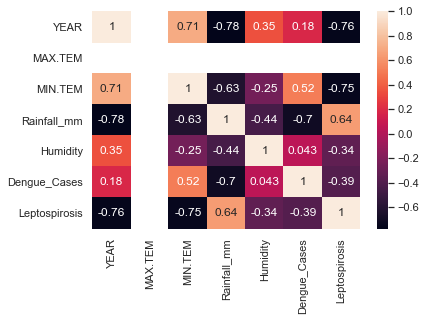

In [131]:
corrMatrix = dfa.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [141]:
dfa.iloc[:, 1:].describe()

,MAX.TEM,MIN.TEM,Rainfall_mm,Humidity,Dengue_Cases,Leptospirosis
count,5.0,5.000000,5.000000,5.000000,5.000000,5.000000
mean,32.0,24.800000,3035.000000,79.800000,329.400000,97.800000
std,0.0,0.447214,505.681224,0.447214,147.684799,28.577964
min,32.0,24.000000,2325.000000,79.000000,181.000000,65.000000
25%,32.0,25.000000,2891.000000,80.000000,192.000000,77.000000
50%,32.0,25.000000,2919.000000,80.000000,318.000000,96.000000
75%,32.0,25.000000,3436.000000,80.000000,446.000000,115.000000
max,32.0,25.000000,3604.000000,80.000000,510.000000,136.000000


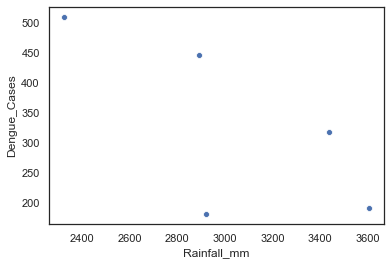

In [142]:
sns.scatterplot(x='Rainfall_mm',y='Dengue_Cases',data=dfa)

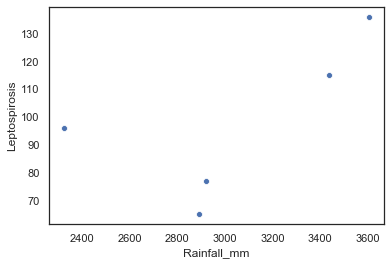

In [143]:
sns.scatterplot(x='Rainfall_mm',y='Leptospirosis',data=dfa)

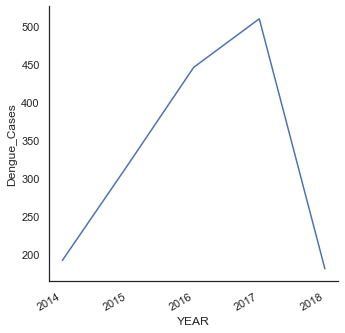

In [144]:
g = sns.relplot(x="YEAR", y="Dengue_Cases", kind="line", data=dfa)
g.fig.autofmt_xdate()

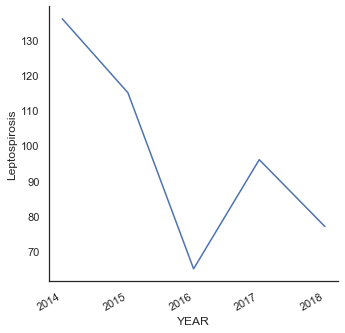

In [145]:
g = sns.relplot(x="YEAR", y="Leptospirosis", kind="line", data=dfa)
g.fig.autofmt_xdate()